# Linear Regression Predicting Disease Spread

## Problem description
***
### You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)<br>

City and date indicators<br>
city – City abbreviations: sj for San Juan and iq for Iquitos<br>
week_start_date – Date given in yyyy-mm-dd format<br>

### NOAA's GHCN daily climate data weather station measurements

station_max_temp_c – Maximum temperature<br>
station_min_temp_c – Minimum temperature<br>
station_avg_temp_c – Average temperature<br>
station_precip_mm – Total precipitation<br>
station_diur_temp_rng_c – Diurnal temperature range<br>

### PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

precipitation_amt_mm – Total precipitation<br>

### NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

reanalysis_sat_precip_amt_mm – Total precipitation<br>
reanalysis_dew_point_temp_k – Mean dew point temperature<br>
reanalysis_air_temp_k – Mean air temperature<br>
reanalysis_relative_humidity_percent – Mean relative humidity<br>
reanalysis_specific_humidity_g_per_kg – Mean specific humidity<br>
reanalysis_precip_amt_kg_per_m2 – Total precipitation<br>
reanalysis_max_air_temp_k – Maximum air temperature<br>
reanalysis_min_air_temp_k – Minimum air temperature<br>
reanalysis_avg_temp_k – Average air temperature<br>
reanalysis_tdtr_k – Diurnal temperature range<br>

### Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

ndvi_se – Pixel southeast of city centroid<br>
ndvi_sw – Pixel southwest of city centroid<br>
ndvi_ne – Pixel northeast of city centroid<br>
ndvi_nw – Pixel northwest of city centroid<br>
***

**Your goal is to predict the number of dengue cases that are going to be found in given city, year, week_of_year and some extra features of weather.**

There are two cities, “San Juan” and “Iquitos” with test data for each city spanning 5 and 3 years respectively. The data for each city have been concatenated along with a city column indicating the source: 'sj' for San Juan and 'iq' for Iquitos. Throughout, missing values have been filled as NaNs.<br>
Download data from:<br>
https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv<br>
https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv

Sort the data by year and week_of_year and choose last 400 rows as test data.

**Task 1: Do all the sorts of pre-processing required along with proper analysis and make data ready for models.**<br>
**Task 2: You are allowed to use only linear regression, report the mean absolute error on the test data (you are free to use** **all sorts of feature conversion techniques, you can add/delete/modify features as you want)**
**Performance metric Mean absolute error**

In [1]:
import datetime
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

C:\Users\GauravP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv("dengue_features_train.csv")
data.shape

(1456, 24)

In [4]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
labels = pd.read_csv("dengue_labels_train.csv")
labels.shape

(1456, 4)

In [6]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [7]:
#adding labels column to our main data
data["Labels"] = labels["total_cases"]

In [8]:
data.shape

(1456, 25)

In [9]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Labels
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [10]:
columnNamesData = data.dtypes.index
columnNamesData

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Labels'],
      dtype='object')

In [11]:
print(columnNamesData.shape)

(25,)


### Task 1: Do all sorts of pre-processing required along with proper analysis and make data ready for models.

In [12]:
#finding for how many values are missing in all the columns in data
for i in columnNamesData:
    count = 0
    s = data[i].isin(["NaN"])
    for j in range(len(s)):
        if s[j]:
            count += 1
    print("Feature "+str(i)+" has "+str(count)+" missing values.\n")

Feature city has 0 missing values.

Feature year has 0 missing values.

Feature weekofyear has 0 missing values.

Feature week_start_date has 0 missing values.

Feature ndvi_ne has 194 missing values.

Feature ndvi_nw has 52 missing values.

Feature ndvi_se has 22 missing values.

Feature ndvi_sw has 22 missing values.

Feature precipitation_amt_mm has 13 missing values.

Feature reanalysis_air_temp_k has 10 missing values.

Feature reanalysis_avg_temp_k has 10 missing values.

Feature reanalysis_dew_point_temp_k has 10 missing values.

Feature reanalysis_max_air_temp_k has 10 missing values.

Feature reanalysis_min_air_temp_k has 10 missing values.

Feature reanalysis_precip_amt_kg_per_m2 has 10 missing values.

Feature reanalysis_relative_humidity_percent has 10 missing values.

Feature reanalysis_sat_precip_amt_mm has 13 missing values.

Feature reanalysis_specific_humidity_g_per_kg has 10 missing values.

Feature reanalysis_tdtr_k has 10 missing values.

Feature station_avg_temp_c 

In [13]:
missingDataColumnNames = columnNamesData[4:24]

In [14]:
missingDataColumnNames

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [15]:
len(missingDataColumnNames)

20

In [16]:
for i in range(len(data["week_start_date"])):
    mydate = data["week_start_date"][i]
    s = time.mktime(datetime.datetime.strptime(mydate, "%Y-%m-%d").timetuple())
    data["week_start_date"][i] = s

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**The date in the column "week_start_date" has been converted into unix timestamp**

In [17]:
data.sort_values("week_start_date", axis = 0, inplace = True)

In [18]:
print(data.shape)

(1456, 25)


In [19]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Labels
0,sj,1990,18,6.41426e+08,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,6.42031e+08,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,6.42636e+08,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,6.43241e+08,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,6.43846e+08,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [21]:
data.reset_index(drop=True, inplace = True)

In [22]:
data["precipitation_amt_mm"].value_counts()[0]

239

In [23]:
for j in range(len(data["precipitation_amt_mm"])):
    a = data["precipitation_amt_mm"][j]
    b = str(a)
    if b == "nan":
        data["precipitation_amt_mm"][j] = 0.00

C:\Users\GauravP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


**During data pre-processing stage it has been found out that the column "precipitation_amt_mm" has 13 missing values and furthermore, most occuring value in this column is 0 which is occuring 239 times out of total 1456. Hence, it has been decided to replace all the missing values of this column with 0.**

In [24]:
data.shape

(1456, 25)

In [28]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Labels
0,sj,1990,18,6.41426e+08,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,6.42031e+08,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,6.42636e+08,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,6.43241e+08,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,6.43846e+08,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [28]:
print("Rows with missing values in more than 10 columns")
missingColumnIndex = []
for i in range(len(data)):
    count = 0
    for j in missingDataColumnNames:
        a =  data.iloc[i][j]
        b = str(a)
        if b == "nan":
            count += 1
    if count > 10:
        missingColumnIndex.append(i)
missingColumnIndex

Rows with missing values in more than 10 columns


[87, 139, 399, 451, 893, 894, 997, 998, 1378, 1430]

**It has been found out that there are 10 rows where more than 10 out of 25 feature values are missing. Therefore, it has been decided that these 10 rows will be removed from the dataset.**

In [29]:
data.drop(data.index[missingColumnIndex], inplace=True)
data.shape

(1446, 25)

In [30]:
data.reset_index(drop=True, inplace = True)

In [31]:
data.shape

(1446, 25)

In [32]:
count = 0
for i in range(len(data["Labels"])):
    if data["Labels"][i] < 34:
        count += 1
perc = (count/len(data["Labels"])) * 100
print("Percentage of rows with labels less than 34 = "+str(perc)+"%")

Percentage of rows with labels less than 34 = 80.56708160442601%


**It has been found out that more than 80% of the rows have dengue cases less than 34. It means all the labels above 34 will be outliers and hence they will impact our model. Therefore, it has been decided that all of the rows with dengue cases above 34 shall be removed.**

In [33]:
RowsWithHighLabels = []
for i in range(len(data["Labels"])):
    if data["Labels"][i] > 34:
        RowsWithHighLabels.append(i)
len(RowsWithHighLabels)

268

In [34]:
data.drop(data.index[RowsWithHighLabels], inplace=True)
data.shape

(1178, 25)

In [35]:
Data = data.reset_index(drop=True, inplace = False)

In [36]:
Data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Labels
0,sj,1990,18,6.41426e+08,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,6.42031e+08,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,6.42636e+08,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,6.43241e+08,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,6.43846e+08,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [37]:
Data.shape

(1178, 25)

In [38]:
Data_cle = Data.drop("city", axis = 1, inplace = False)

In [39]:
Data_city = Data["city"]

In [40]:
Data_cle.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Labels
0,1990,18,6.41426e+08,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,6.42031e+08,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,6.42636e+08,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,6.43241e+08,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,6.43846e+08,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [41]:
Data_cle.shape

(1178, 24)

In [42]:
columnNamesData2 = Data_cle.dtypes.index
columnNamesData2

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Labels'],
      dtype='object')

In [43]:
missingImputation = Imputer(missing_values = "NaN", strategy = "median", axis = 0, copy = False)

mi = missingImputation.fit_transform(Data_cle)

**All of the missing values in dataset have been imputed using median strategy as medians are less impacted by outliers**

In [44]:
Data_New = pd.DataFrame(mi, columns=columnNamesData2)
Data_New.head(20)

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Labels
0,1990.0,18.0,641426400.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1990.0,19.0,642031200.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1990.0,20.0,642636000.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1990.0,21.0,643240800.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1990.0,22.0,643845600.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
5,1990.0,23.0,644450400.0,0.158056,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2.0
6,1990.0,24.0,645055200.0,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4.0
7,1990.0,25.0,645660000.0,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5.0
8,1990.0,26.0,646264800.0,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10.0
9,1990.0,27.0,646869600.0,0.158056,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6.0


In [45]:
Data_New.shape

(1178, 24)

### Task 2: You are allowed to use only linear regression, report the mean absolute error on the test data (you are free to use all sorts of feature conversion techniques, you can add/delete/modify features as you want) Performance metric Mean absolute error

In [46]:
Final_Data = Data_New.drop("Labels", axis = 1, inplace = False)
Final_Data_Labels = Data_New["Labels"]

In [47]:
print(Final_Data.shape)
print(Final_Data_Labels.shape)

(1178, 23)
(1178,)


In [48]:
Final_Data_std = StandardScaler().fit_transform(Final_Data)
Final_Data_std.shape

(1178, 23)

In [62]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Final_Data_std, Final_Data_Labels, test_size = 0.17, random_state = 5)
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((977, 23), (201, 23), (977,), (201,))

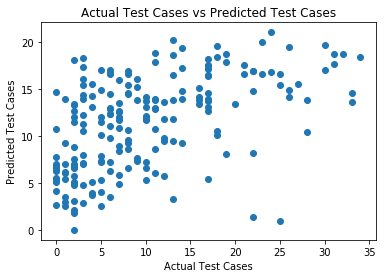

In [63]:
clf = LinearRegression()
clf.fit(X_Train, Y_Train)

Y_pred = clf.predict(X_Test)

plt.scatter(Y_Test, Y_pred)
plt.xlabel("Actual Test Cases")
plt.ylabel("Predicted Test Cases")
plt.title("Actual Test Cases vs Predicted Test Cases")
plt.show()

In [64]:
print("(Y_true, Predicted Y)")
for xy in zip(Y_Test, Y_pred):
    print(xy)

(Y_true, Predicted Y)
(8.0, 8.57869780568274)
(7.0, 12.49564321685605)
(2.0, 6.537481530084217)
(21.0, 17.54969375210083)
(2.0, 12.684129602640269)
(2.0, 7.039845271811534)
(8.0, 16.908274594381698)
(3.0, 11.292796879565483)
(3.0, 2.8930220793398274)
(5.0, 2.4901349893894995)
(0.0, 4.165682046902185)
(7.0, 8.42440800370681)
(11.0, 10.700621609146683)
(32.0, 18.748397739149297)
(22.0, 8.218447946267995)
(2.0, 18.040185339605795)
(14.0, 14.781597211545524)
(18.0, 18.344617006042306)
(1.0, 13.869782602969089)
(17.0, 14.586724184103836)
(10.0, 5.300632975667637)
(5.0, 4.0189111758026)
(8.0, 10.631393226927383)
(17.0, 17.40398063545626)
(10.0, 11.654282054585043)
(3.0, 16.075715581629908)
(2.0, 5.0702844564710325)
(9.0, 7.663074373648297)
(6.0, 6.282395806707527)
(22.0, 1.3702074892329712)
(22.0, 14.727596727446631)
(1.0, 3.515562641403287)
(2.0, 6.746329324923872)
(5.0, 10.077804128900478)
(26.0, 14.871236237871761)
(4.0, 14.286132807068215)
(2.0, 8.801112865545718)
(12.0, 5.74100257649261

In [65]:
print("Mean Absolute Error = "+str(mean_absolute_error(Y_Test, Y_pred)))

Mean Absolute Error = 5.758645447993808
